#### About Dataset

The dataset was developed by starting with satellite images of the ocean, some of which contain an oil spill and some that do not. Images were split into sections and processed using computer vision algorithms to provide a vector of features to describe the contents of the image section or patch. The task is, given a vector that describes the contents of a patch of a satellite image, then predicts whether the patch contains an oil spill or not, e.g. from the illegal or accidental dumping of oil in the ocean.<br>

There are two classes and the goal is to distinguish between spill and non-spill using the features for a given ocean patch.<br>

* **Non-Spill:** negative case, or majority class. <br>
* **Spill:** positive case, or minority class. <br>

There are a total of 50 Columns in the Dataset , the output column is named as target.

* Download the Oil Spill Dataset and perform Data cleaning and Data Pre-Processing if Necessary.<br>

* Use the various methods such as Handling null values, One-Hot Encoding, Imputation and Scaling of Data Pre-Processing where necessary.<br>

* Derive some insights from the dataset.<br>

* Apply various Machine Learning techniques to predict the output in target column, make use of Bagging and Ensemble as required and find the best model by evaluating the model using Model evaluation techniques.<br>

* Save the best model and Load the model.<br>

* Take the original data set and make another dataset by randomly picking 20 data points from the oil spill dataset and apply the saved model on the same.<br>

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset

In [3]:
df = pd.read_csv('oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


#### Exploring the dataset

In [4]:
print("No. Of Rows:", df.shape[0],'\nNo. of Columns:',df.shape[1])

No. Of Rows: 937 
No. of Columns: 50


In [5]:
df.dtypes.value_counts()

float64    39
int64      11
Name: count, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
f_1,937.0,81.588047,6.497673e+01,1.00,31.00,64.00,124.00,352.00
f_2,937.0,332.842049,1.931939e+03,10.00,20.00,65.00,132.00,32389.00
f_3,937.0,698.707086,5.999656e+02,1.92,85.27,704.37,1223.48,1893.08
f_4,937.0,870.992209,5.227993e+02,1.00,444.20,761.28,1260.37,2724.57
f_5,937.0,84.121665,4.536177e+01,0.00,54.00,73.00,117.00,180.00
f_6,937.0,769696.378869,3.831151e+06,70312.00,125000.00,186300.00,330468.00,71315000.00
f_7,937.0,43.242721,1.271840e+01,21.24,33.65,39.97,52.42,82.64
f_8,937.0,9.127887,3.588878e+00,0.83,6.75,8.20,10.76,24.69
f_9,937.0,3940.712914,8.167428e+03,667.00,1371.00,2090.00,3435.00,160740.00
f_10,937.0,0.221003,9.031555e-02,0.02,0.16,0.20,0.26,0.74


#### Checking column unique values

In [7]:
df['f_23'].unique()

array([0], dtype=int64)

#### Dropping column having Null value in the form of 0 and checking the dataframe

In [8]:
df.drop('f_23',axis=1,inplace=True)
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


#### Checking for duplicates in dataset

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [11]:
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

#### Checking Target Column values

In [12]:
df.columns

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29',
       'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38',
       'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47',
       'f_48', 'f_49', 'target'],
      dtype='object')

In [13]:
df['target'].value_counts()

target
0    896
1     41
Name: count, dtype: int64

#### Checking correlation between columns of Dataset

In [14]:
corr =df.corr()
# corr = corr[corr<0.9]
corr

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
f_1,1.000000,-0.155581,0.172017,-0.104116,-0.017025,-0.169533,-0.037412,-0.204983,-0.244551,-0.214447,...,-0.286190,-0.167466,-0.156916,-0.141792,-0.139478,-0.163693,-0.202983,0.294422,-0.253698,-0.180531
f_2,-0.155581,1.000000,0.058390,0.052638,-0.036870,0.953947,-0.136761,-0.016822,0.829978,0.128465,...,0.555154,0.777807,0.800939,0.716496,-0.080879,-0.048315,0.118792,-0.128222,0.139417,0.034128
f_3,0.172017,0.058390,1.000000,0.549510,-0.082764,0.050795,-0.627934,-0.349541,0.158686,0.073794,...,0.186920,0.178287,0.129653,0.176883,-0.088310,-0.182458,-0.022098,0.048291,0.162600,-0.035221
f_4,-0.104116,0.052638,0.549510,1.000000,0.048847,0.024693,-0.546205,-0.222063,0.097683,0.202167,...,-0.046934,0.032402,0.022234,0.000664,-0.220461,-0.204776,0.106758,-0.394081,0.476127,-0.050489
f_5,-0.017025,-0.036870,-0.082764,0.048847,1.000000,-0.028431,0.059128,0.123814,-0.047879,0.098573,...,-0.066930,-0.014877,-0.013742,-0.012346,-0.076695,-0.080136,0.070070,-0.135294,0.116896,-0.078598
f_6,-0.169533,0.953947,0.050795,0.024693,-0.028431,1.000000,-0.093589,-0.001395,0.894150,0.097449,...,0.594273,0.844597,0.868353,0.770044,-0.077783,-0.046834,0.126850,-0.058752,0.069731,0.049318
f_7,-0.037412,-0.136761,-0.627934,-0.546205,0.059128,-0.093589,1.000000,0.381206,-0.188076,-0.380340,...,-0.115014,-0.100003,-0.074308,-0.073751,0.077207,0.088633,-0.157243,0.483034,-0.612819,-0.026183
f_8,-0.204983,-0.016822,-0.349541,-0.222063,0.123814,-0.001395,0.381206,1.000000,0.001073,0.670628,...,0.013476,-0.015712,-0.013193,0.002439,-0.061639,-0.051879,-0.028117,-0.101155,0.033731,-0.014434
f_9,-0.244551,0.829978,0.158686,0.097683,-0.047879,0.894150,-0.188076,0.001073,1.000000,0.164098,...,0.675610,0.784833,0.770129,0.736075,-0.073312,-0.048994,0.102540,-0.080203,0.113389,0.076679
f_10,-0.214447,0.128465,0.073794,0.202167,0.098573,0.097449,-0.380340,0.670628,0.164098,1.000000,...,0.082449,0.052518,0.043116,0.042269,-0.113481,-0.095896,0.112275,-0.587156,0.603358,-0.013359


#### Visualizing dataset for more insights

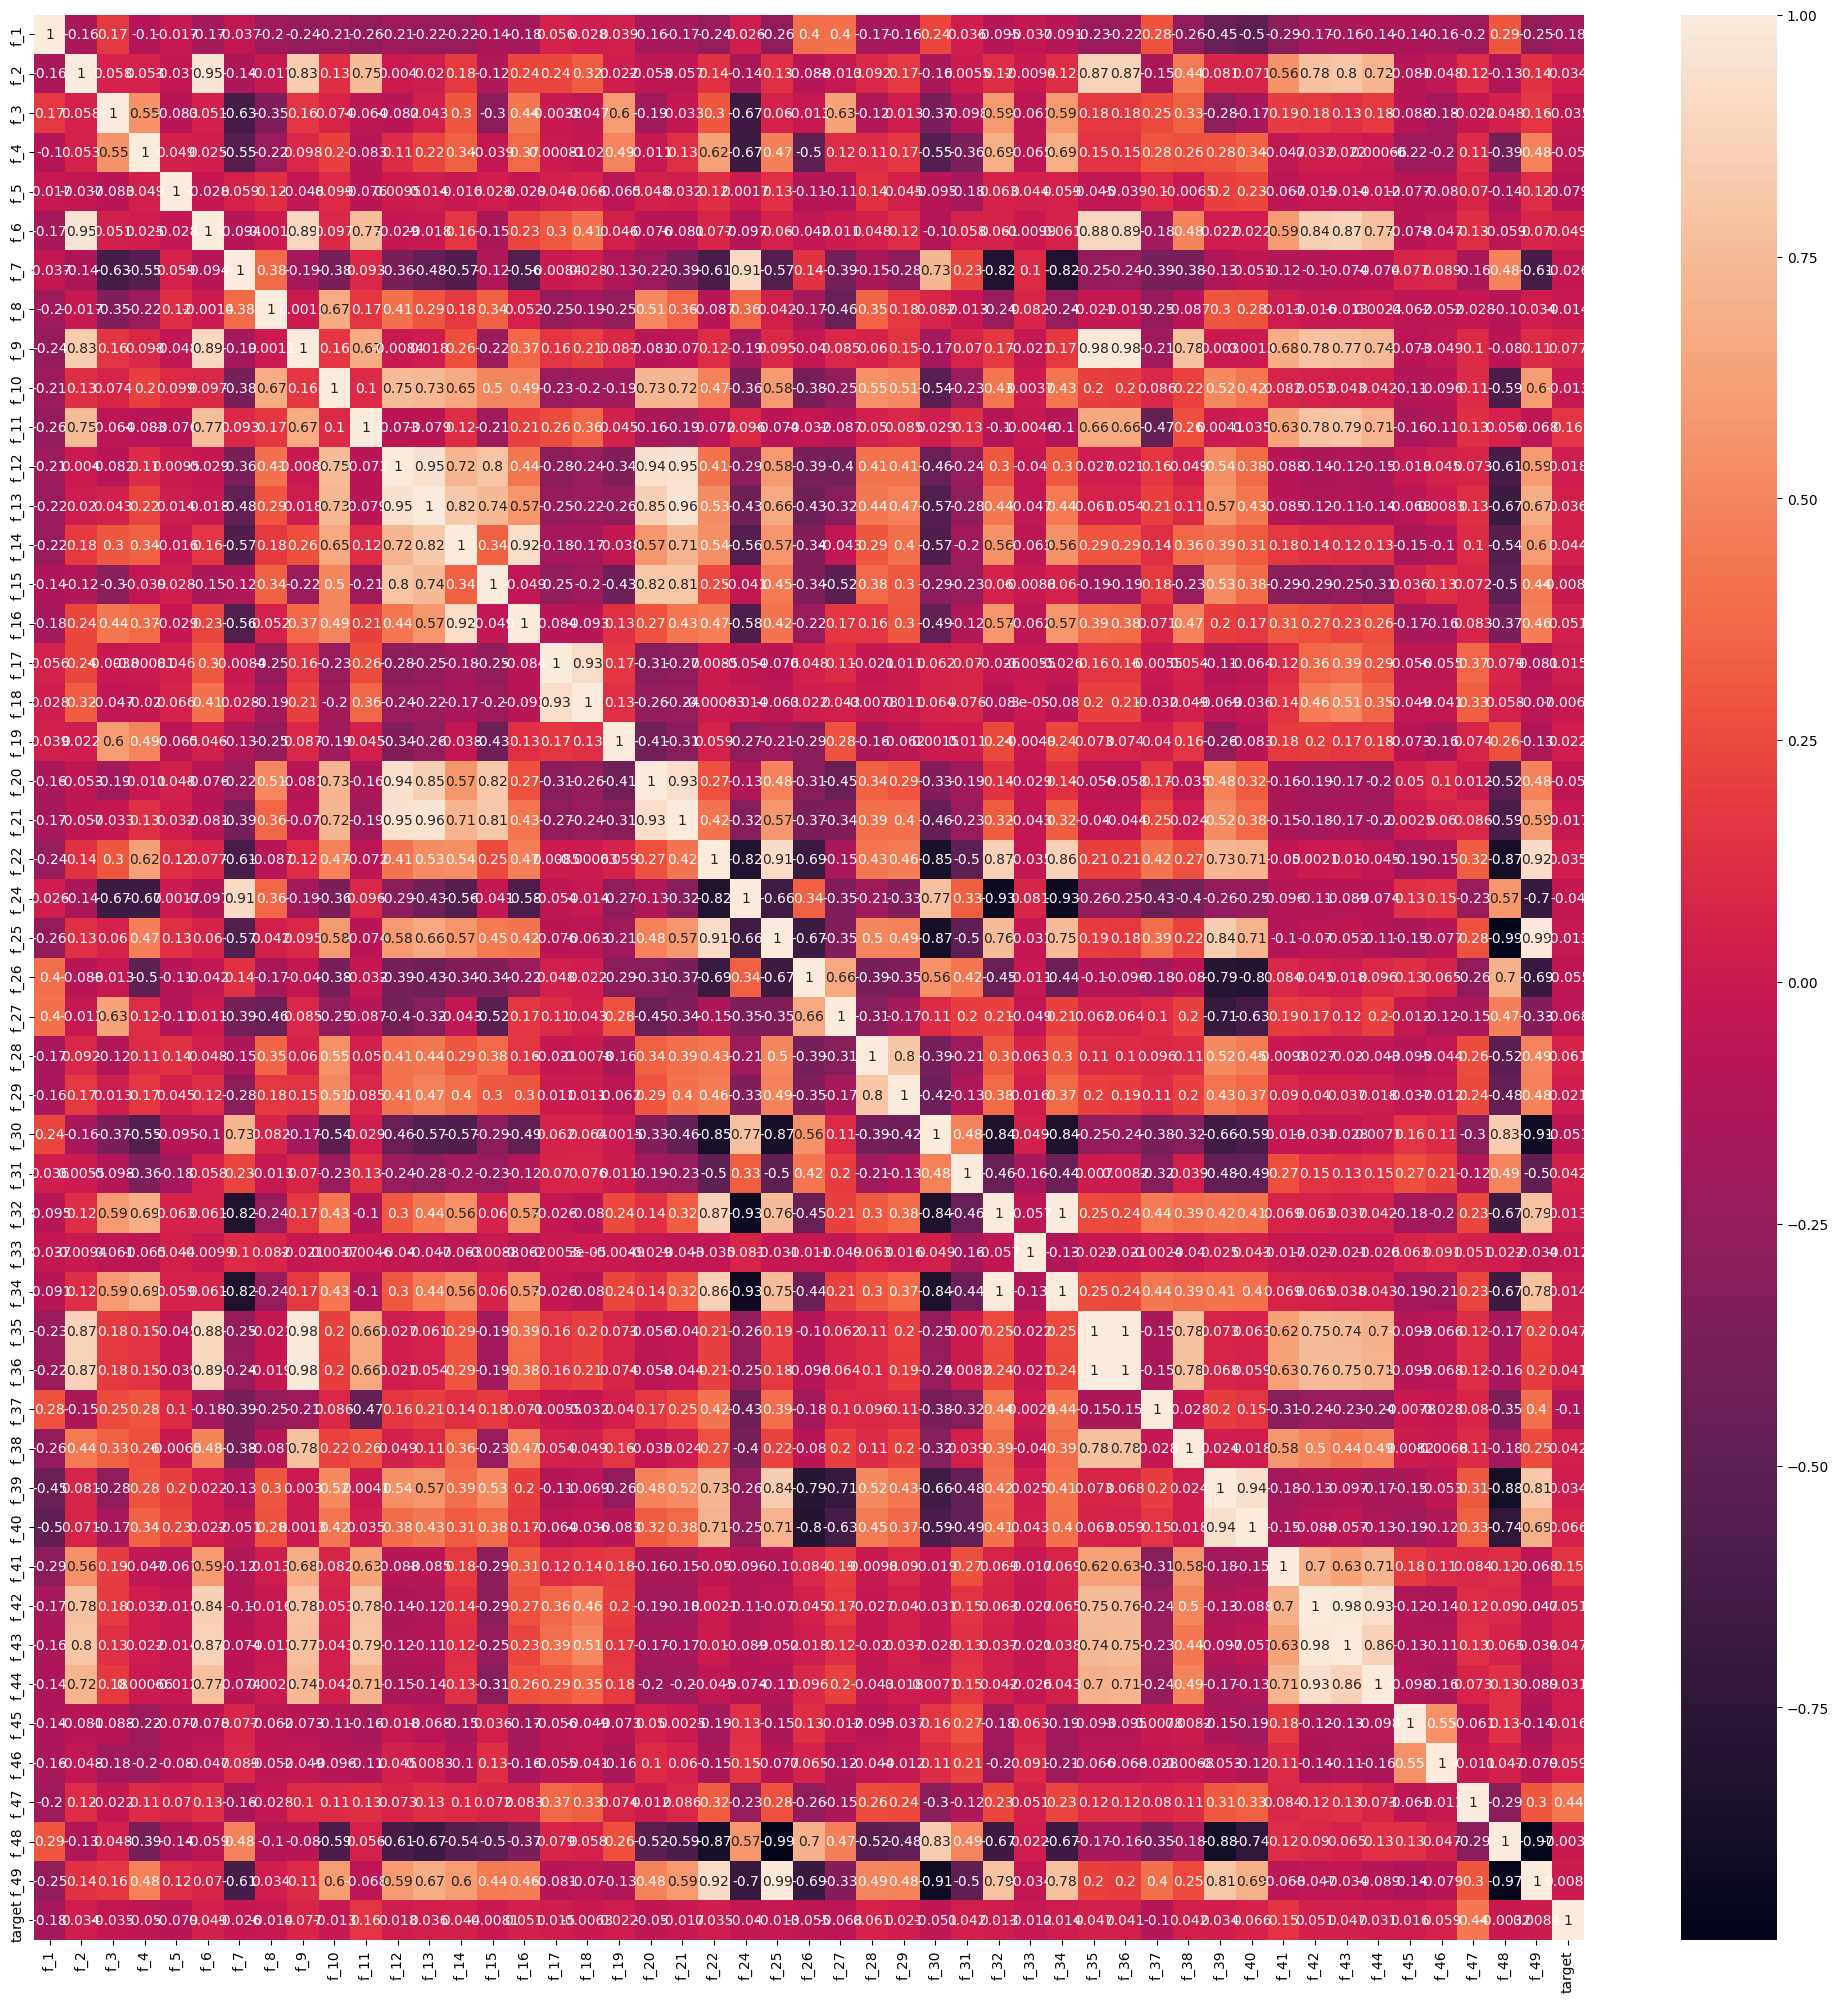

In [15]:
corr= df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)
plt.show()

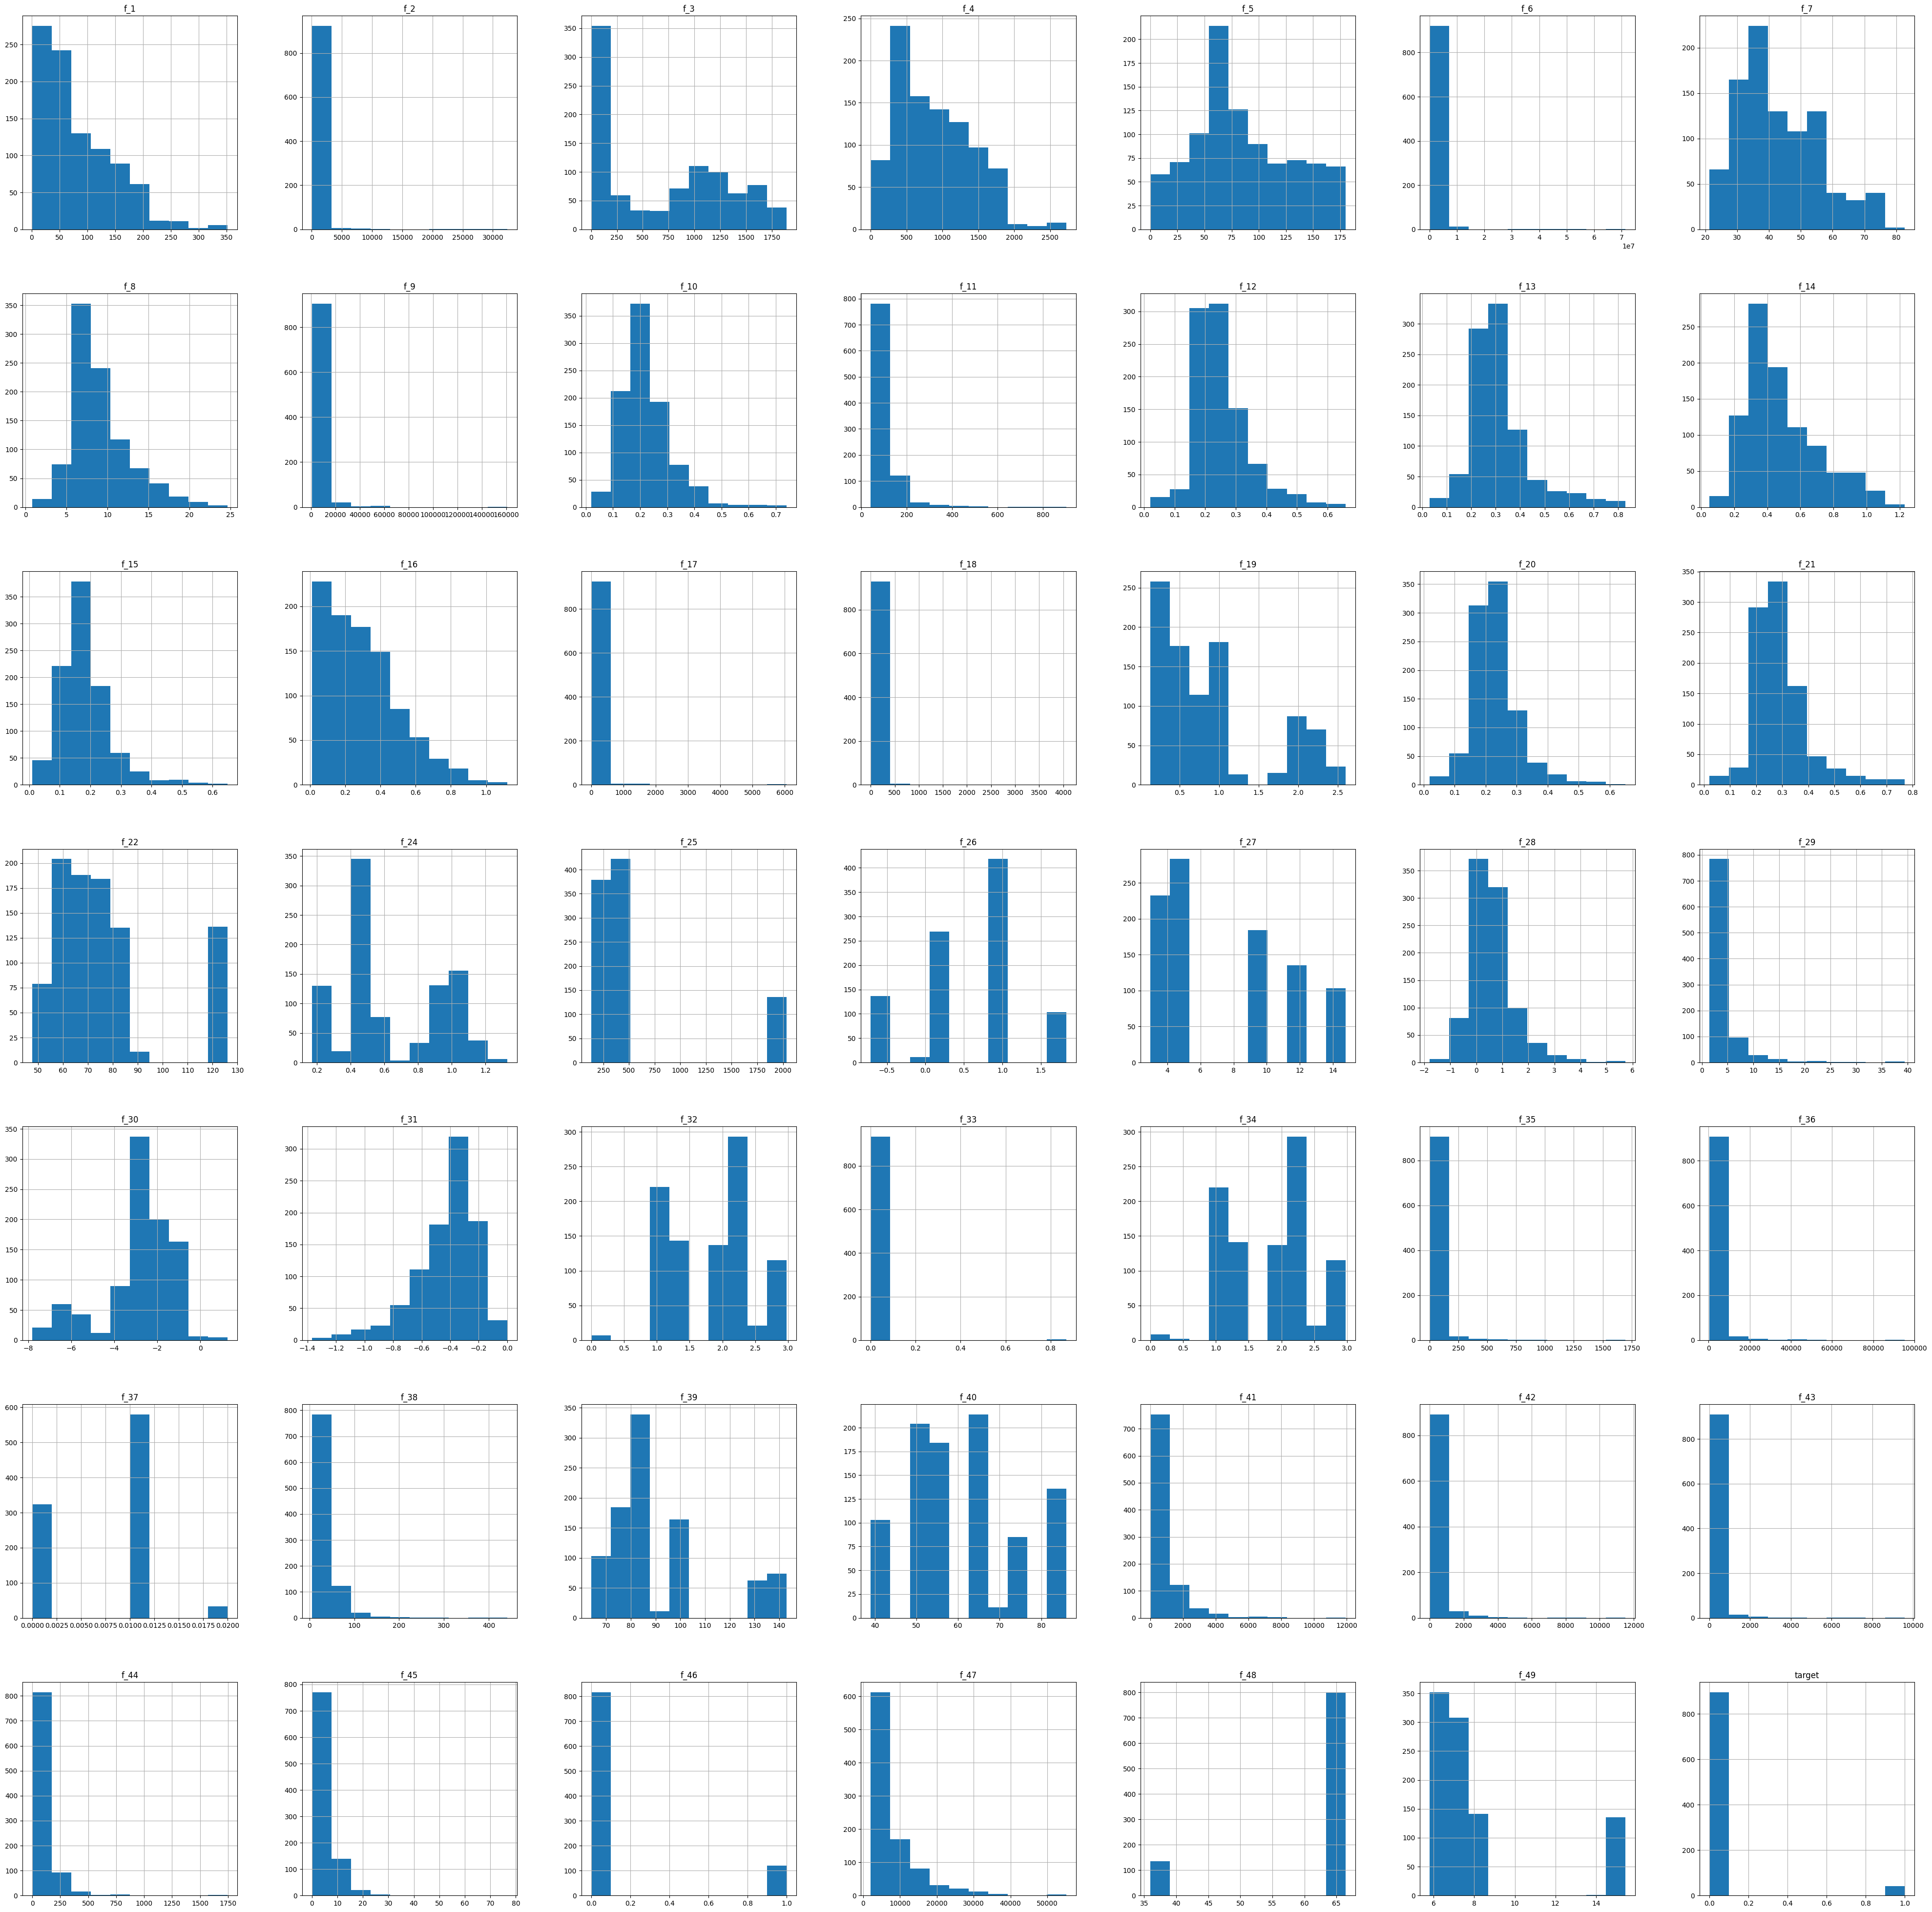

In [16]:
fig = plt.figure(figsize=(50,50))
ax = fig.gca()

Hist= df.hist(ax=ax)

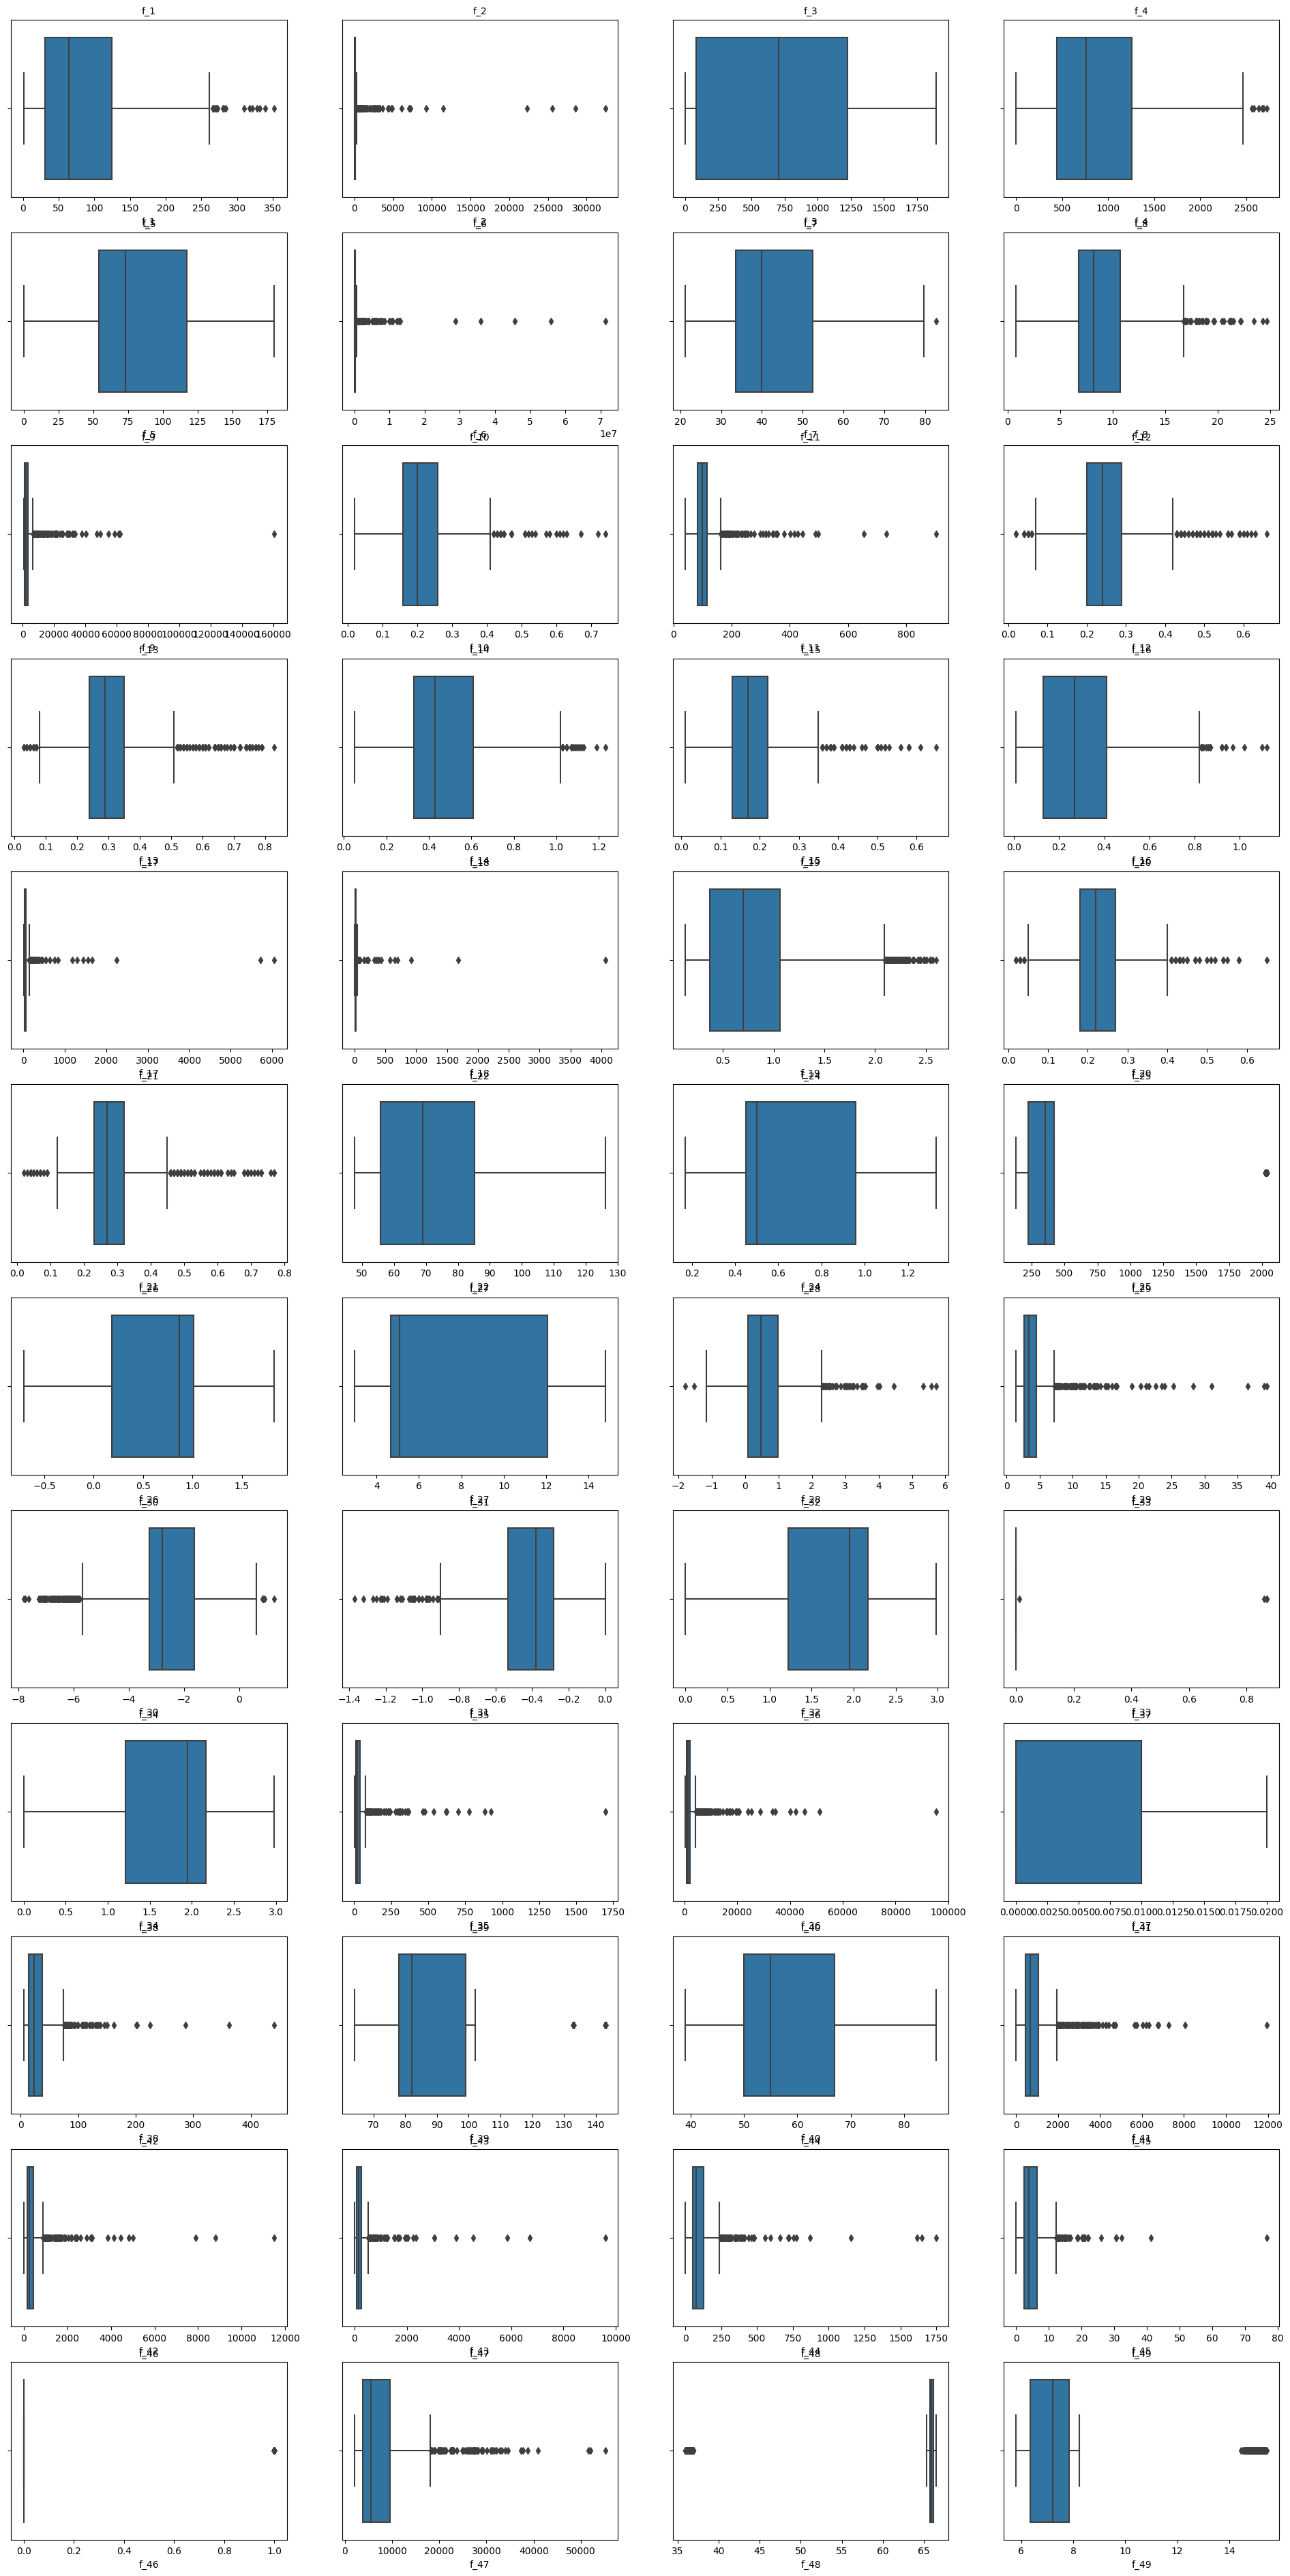

In [17]:
plt.figure(figsize = (24,48))
for i in range(48):
    plt.subplot(12,4, i+1)
    sns.boxplot(x=df.iloc[:,i])   # detect outliers
    plt.title(df.columns[i], size = 10)
plt.show()


#### Checking Highly correlated column and drop them.

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()   # correlation matrix
    for i in range(len(corr_matrix.columns)):  # i is the index
        for j in range(i):
            if(corr_matrix.iloc[i,j]) > threshold:
                print('i:',i,'\n','j:',j,'\n',corr_matrix.iloc[i,j])
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

corr_features = correlation(df, 0.90)
print("Features with high correlation ", corr_features)

i: 5 
 j: 1 
 0.9539466004941083
i: 12 
 j: 11 
 0.9506666806455
i: 15 
 j: 13 
 0.9242300665536263
i: 17 
 j: 16 
 0.9262668747948501
i: 19 
 j: 11 
 0.9428153889675622
i: 20 
 j: 11 
 0.952653488244504
i: 20 
 j: 12 
 0.9550177132823413
i: 20 
 j: 19 
 0.9348591964701091
i: 22 
 j: 6 
 0.9065240360470295
i: 23 
 j: 21 
 0.9148772334623562
i: 32 
 j: 30 
 0.9971067125382395
i: 33 
 j: 8 
 0.979516604344346
i: 34 
 j: 8 
 0.9808755713836042
i: 34 
 j: 33 
 0.9992469070671817
i: 38 
 j: 37 
 0.9401404980855348
i: 41 
 j: 40 
 0.9798360999341487
i: 42 
 j: 40 
 0.9323827736856241
i: 47 
 j: 21 
 0.9165438411227731
i: 47 
 j: 23 
 0.986719509201517
Features with high correlation  ['f_21', 'f_16', 'f_13', 'f_25', 'f_40', 'f_36', 'f_18', 'f_6', 'f_20', 'f_24', 'f_35', 'f_49', 'f_34', 'f_44', 'f_43']


In [19]:
print(len(corr_features))

15


In [20]:
df.drop(columns=corr_features, axis=1, inplace=True)
print(df.shape)

(937, 34)


In [21]:
df.head()

,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48,target
0,1,2558,1506.09,456.63,90,40.88,7.89,29780.0,0.19,214.7,...,0.00,138.68,89,2850.00,1000.00,3.73,0,33243.19,65.74,1
1,2,22325,79.11,841.03,180,51.11,1.21,61900.0,0.02,901.7,...,0.00,68.65,89,5750.00,11500.00,0.60,0,51572.04,65.73,0
2,3,115,1449.85,608.43,88,40.42,7.34,3340.0,0.18,86.1,...,0.01,38.80,89,1400.00,250.00,9.33,1,31692.84,65.81,1
3,4,1201,1562.53,295.65,66,42.40,7.97,18030.0,0.19,166.5,...,0.00,108.27,89,6041.52,761.58,13.33,1,37696.21,65.67,1
4,5,312,950.27,440.86,37,41.43,7.03,3350.0,0.17,232.8,...,0.00,14.39,89,1320.04,710.63,2.58,0,29038.17,65.66,0


#### Select the Dependent and Independent Features

In [22]:
x = df.drop('target',axis=1)  # dataframe
y = df['target']              # series
print(type(x))
print(type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(937, 33) (937,)


#### Dividing the data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(702, 33)
(235, 33)
(702,)
(235,)


#### Creating Functions to generate confusion matrix, classification report, accuracy score, ROC_AUC Score and to compute Training and the Testing Score

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [26]:
d = {'Model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}

def eval_model(model,model_name,x_test,ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    acc = accuracy_score(ytest,ypred)
    cls_rep = classification_report(ytest,ypred,zero_division=0)
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Confusion Matrix\n',cm)
    print('Accuracy Score',acc)
    print('AUC Score',auc_score)
    print('Classification Report\n',cls_rep)
    d['Model'].append(model_name)
    d['TP'].append(cm[0,0])
    d['FN'].append(cm[0,1])
    d['FP'].append(cm[1,0])
    d['TN'].append(cm[1,1])
    d['Acc'].append(acc)
    d['AUC'].append(auc_score)
    
    
def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc_score = roc_auc_score(y_test,model.predict_proba(x_test)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()
    
def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training dataset Accuracy
    print('Testing Score',model.score(x_test,y_test))     # Testing dataset accuracy

#### 1) Applying Logistic Regression

In [27]:
# importing LogReg library
from sklearn.linear_model import LogisticRegression

In [28]:
# Building the LogReg model
log_reg = LogisticRegression(max_iter=100000,solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=100000, solver='liblinear')

In [29]:
# Computing Training and testing score
mscore(log_reg)

Training Score 0.9686609686609686
Testing Score 0.9702127659574468


In [30]:
# Generating prediction
ypred_logreg = log_reg.predict(x_test)
print(ypred_logreg)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
# Evaluate the model - confusion matrix, clasification Report, AUC Score, Accuaracy
eval_model(log_reg,'Log_Reg',x_test,y_test,ypred_logreg)

Confusion Matrix
 [[222   4]
 [  3   6]]
Accuracy Score 0.9702127659574468
AUC Score 0.8308751229105211
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       226
           1       0.60      0.67      0.63         9

    accuracy                           0.97       235
   macro avg       0.79      0.82      0.81       235
weighted avg       0.97      0.97      0.97       235



Area Under Curve 0.8308751229105211


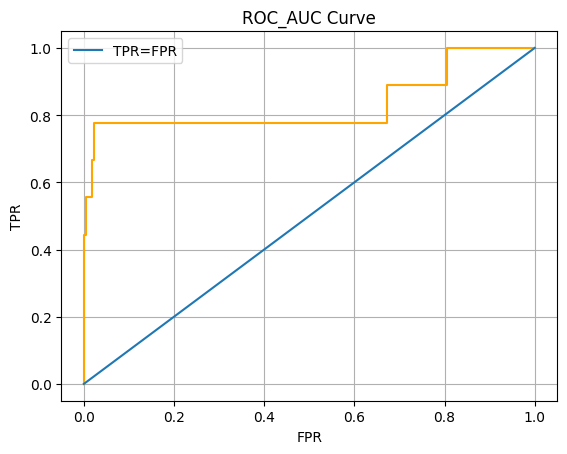

In [32]:
# Plotting ROC AUC Curve
plot_roc_auc(log_reg,y_test)

#### Applying Decision Tree Classifier

In [33]:
# importing DT library
from sklearn.tree import DecisionTreeClassifier

In [34]:
# Building the Decition Tree model
dt = DecisionTreeClassifier(criterion='gini',min_samples_split=50,max_depth=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [35]:
# Training and the Testing Score
mscore(dt)

Training Score 0.9601139601139601
Testing Score 0.9617021276595744


In [36]:
# Generating the predictions
ypred_dt = dt.predict(x_test)

In [37]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(dt,'DT',x_test,y_test,ypred_dt)

Confusion Matrix
 [[226   0]
 [  9   0]]
Accuracy Score 0.9617021276595744
AUC Score 0.9818092428711898
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       0.00      0.00      0.00         9

    accuracy                           0.96       235
   macro avg       0.48      0.50      0.49       235
weighted avg       0.92      0.96      0.94       235



Area Under Curve 0.9818092428711898


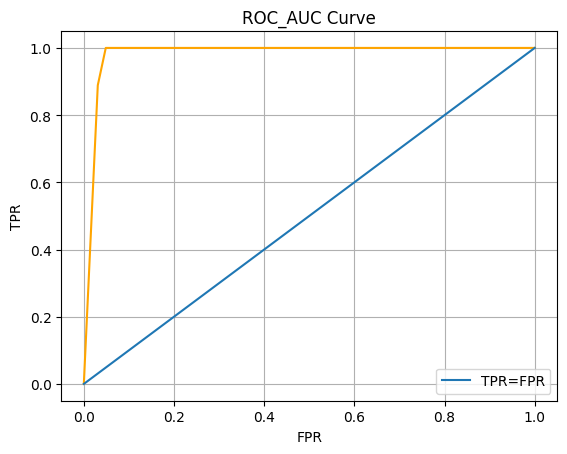

In [38]:
# Plotting ROC_AUC Curve
plot_roc_auc(dt,y_test)

#### Applying RandomForest Classifier

In [39]:
# Import random Forest library
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Building the RF Model
rf = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=50,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [41]:
# Training and the testing Score
mscore(rf)

Training Score 0.9544159544159544
Testing Score 0.9617021276595744


In [42]:
# Generating the predictions
ypred_rf = rf.predict(x_test)

In [43]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(rf,'Random Forest',x_test,y_test,ypred_rf)

Confusion Matrix
 [[226   0]
 [  9   0]]
Accuracy Score 0.9617021276595744
AUC Score 0.9754178957718781
Classification Report
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       226
           1       0.00      0.00      0.00         9

    accuracy                           0.96       235
   macro avg       0.48      0.50      0.49       235
weighted avg       0.92      0.96      0.94       235



Area Under Curve 0.9754178957718781


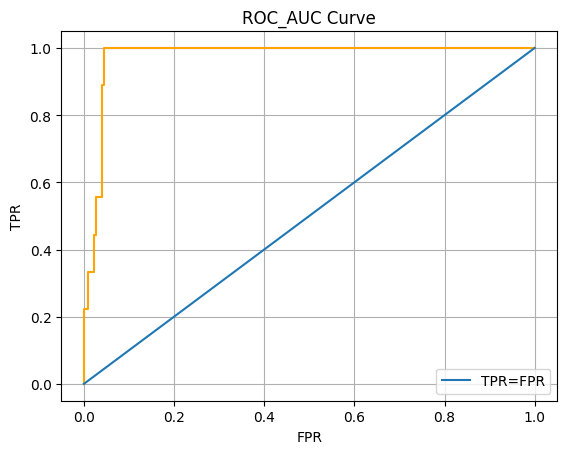

In [44]:
# Plotting ROC_AUC Curve
plot_roc_auc(rf,y_test)

#### Applying BaggingClassifier

In [45]:
#Importing Bagging Classifier
from sklearn.ensemble import BaggingClassifier

In [46]:
bagclass=BaggingClassifier()
bagclass.fit(x_train,y_train)

BaggingClassifier()

In [47]:
# Computing the Training and Testing Score
mscore(bagclass)

Training Score 0.9943019943019943
Testing Score 0.948936170212766


In [48]:
# Generating the predictions
ypred_bag = bagclass.predict(x_test)

In [49]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(bagclass,'BaggingClassifier',x_test,y_test,ypred_bag)

Confusion Matrix
 [[219   7]
 [  5   4]]
Accuracy Score 0.948936170212766
AUC Score 0.9572271386430679
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       226
           1       0.36      0.44      0.40         9

    accuracy                           0.95       235
   macro avg       0.67      0.71      0.69       235
weighted avg       0.95      0.95      0.95       235



Area Under Curve 0.9572271386430679


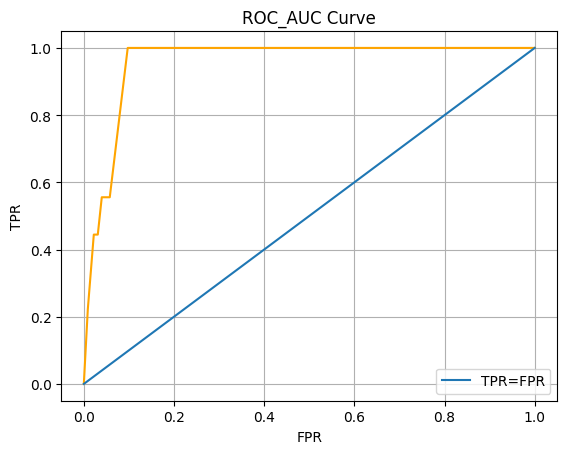

In [50]:
# Plotting the ROC_AUC Curve
plot_roc_auc(bagclass,y_test)

#### Applying Ensemble Learning

In [51]:
# Importing the  AdaBoost Classifier library
from sklearn.ensemble import AdaBoostClassifier

In [52]:
# Builing the Adaboost model
adab = AdaBoostClassifier(n_estimators=70)
adab.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=70)

In [53]:
# Computing the Training and Testing Score
mscore(adab)

Training Score 1.0
Testing Score 0.9659574468085106


In [54]:
# Generating the predictions
ypred_adab = adab.predict(x_test)

In [55]:
# Evaluate the model - confusion matrix, classification Report, AUC Score, Accuaracy
eval_model(adab,'AdaBoost',x_test,y_test,ypred_adab)

Confusion Matrix
 [[223   3]
 [  5   4]]
Accuracy Score 0.9659574468085106
AUC Score 0.8441494591937071
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       226
           1       0.57      0.44      0.50         9

    accuracy                           0.97       235
   macro avg       0.77      0.72      0.74       235
weighted avg       0.96      0.97      0.96       235



Area Under Curve 0.8441494591937071


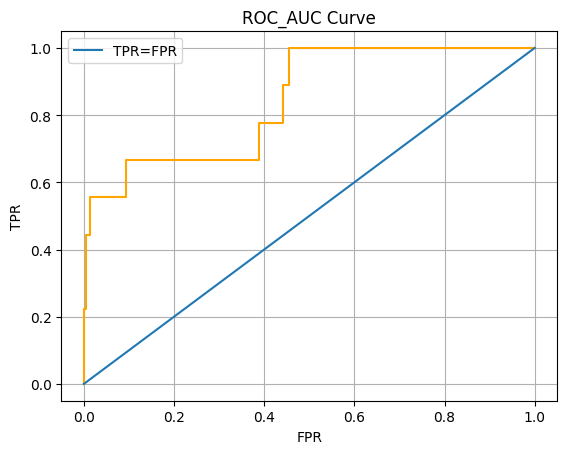

In [56]:
# Plotting the ROC_AUC Curve
plot_roc_auc(adab,y_test)

#### Comparing different Classification Models

In [57]:
print(d)

{'Model': ['Log_Reg', 'DT', 'Random Forest', 'BaggingClassifier', 'AdaBoost'], 'TP': [222, 226, 226, 219, 223], 'FN': [4, 0, 0, 7, 3], 'FP': [3, 9, 9, 5, 5], 'TN': [6, 0, 0, 4, 4], 'Acc': [0.9702127659574468, 0.9617021276595744, 0.9617021276595744, 0.948936170212766, 0.9659574468085106], 'AUC': [0.8308751229105211, 0.9818092428711898, 0.9754178957718781, 0.9572271386430679, 0.8441494591937071]}


In [58]:
model_performance = pd.DataFrame(d)
model_performance

,Model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,222,4,3,6,0.970213,0.830875
1,DT,226,0,9,0,0.961702,0.981809
2,Random Forest,226,0,9,0,0.961702,0.975418
3,BaggingClassifier,219,7,5,4,0.948936,0.957227
4,AdaBoost,223,3,5,4,0.965957,0.844149


#### Generating Predictions on Random Test data from given dataset using Random forest Classifier

#### Final model (RandomForest Classifier) based on Evaluation from model_performance dataframe

In [59]:
model = RandomForestClassifier(n_estimators=80,criterion='gini',min_samples_split=50,max_depth=10)
model.fit(x,y) 

RandomForestClassifier(max_depth=10, min_samples_split=50, n_estimators=80)

In [68]:
sample_df = df.sample(20,random_state=20)
sample_df = sample_df.drop('target',axis=1)
print(x.shape)
print(sample_df.shape)
sample_df

(937, 33)
(20, 33)


,f_1,f_2,f_3,f_4,f_5,f_7,f_8,f_9,f_10,f_11,...,f_33,f_37,f_38,f_39,f_41,f_42,f_45,f_46,f_47,f_48
592,24,61,22.00,465.15,88,48.10,13.42,3128.0,0.28,158.0,...,0.0,0.00,19.80,99,1080.00,630.00,2.88,0,5989.12,65.95
62,52,66,1563.39,1750.32,34,35.11,6.47,2060.0,0.18,80.1,...,0.0,0.00,25.72,78,901.39,250.00,7.02,0,4082.96,66.41
366,89,56,1208.68,1824.79,9,39.32,7.60,1960.0,0.19,71.4,...,0.0,0.01,27.44,85,657.65,304.14,4.61,0,9964.52,66.34
403,136,103,844.54,971.42,90,42.71,5.48,2940.0,0.13,87.6,...,0.0,0.01,33.57,85,850.00,450.00,3.85,0,3670.84,65.90
874,142,16,6.19,509.25,73,55.81,9.17,1228.0,0.16,105.5,...,0.0,0.00,11.64,82,569.21,201.25,4.61,0,3807.97,66.01
443,11,173,239.32,1410.40,152,24.06,6.45,2213.5,0.27,109.9,...,0.0,0.01,20.14,133,0.00,0.00,0.00,0,15072.37,36.17
58,48,56,1726.89,1789.38,43,35.96,6.39,2140.0,0.18,65.4,...,0.0,0.01,32.71,78,1063.01,141.42,21.87,1,6875.40,66.45
820,88,15,84.53,438.40,64,50.47,10.38,1191.0,0.21,102.0,...,0.0,0.00,11.67,82,569.21,180.00,6.32,0,2276.28,65.94
116,106,116,780.74,1650.50,106,36.33,9.36,3380.0,0.26,85.8,...,0.0,0.01,39.39,78,1298.08,316.23,7.41,0,11823.49,66.25
533,39,65,59.12,1234.18,155,23.43,7.83,1741.5,0.33,52.5,...,0.0,0.02,33.18,143,788.39,167.71,10.74,0,10051.15,36.03


In [69]:
sample_df.to_csv('Sample_data_ML_project',index=False)

#### Generating Predictions on the test_df

In [71]:
ypred = model.predict(sample_df)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

#### Save the Model

In [72]:
import pickle

In [73]:
pickle.dump(model, open('oil_spill_predict.pkl', 'wb'))   # wb = write binary

#### Load the Model

In [75]:
loaded_model = pickle.load(open('oil_spill_predict.pkl', 'rb'))  # rb = read binary

In [76]:
OilSpill_pred = loaded_model.predict(sample_df)
print(OilSpill_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
